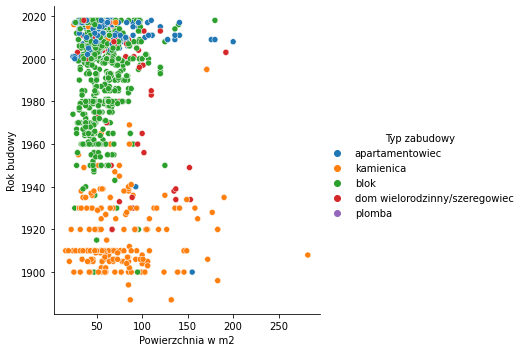

In [133]:
import pandas as pd
import seaborn
import numpy as np

data = pd.read_csv('mieszkania4.tsv', sep='\t')

data = data[(data['Rok budowy'] == data['Rok budowy']) & (data['Powierzchnia w m2'] == data['Powierzchnia w m2']) & (data['Typ zabudowy'] == data['Typ zabudowy'])]
data = data.dropna(subset=['Powierzchnia w m2', 'Rok budowy', 'Typ zabudowy'])
seaborn.relplot(data=data, x='Powierzchnia w m2', y='Rok budowy', hue='Typ zabudowy')

In [134]:
border = int((len(data)/5) * 4)
x = data['Powierzchnia w m2']
y = data['Rok budowy']
z = data['Typ zabudowy']
trening_p = x[:border]
trening_r = y[:border]
trening_t = z[:border]
test_p = x[border:]
test_r = y[border:]
test_t = z[border:]

In [135]:
features = ['Powierzchnia w m2', 'Rok budowy']
m = len(data)
X = np.matrix(data[features])
X0 = np.ones(m).reshape(m, 1)
X = np.hstack((X0, X))
y = np.matrix(data[["Typ zabudowy"]]).reshape(m, 1)

In [136]:
def mapY(y, cls):
    m = len(y)
    yBi = np.matrix(np.zeros(m)).reshape(m, 1)
    yBi[y == cls] = 1.
    return yBi

def indicatorMatrix(y):
    classes = np.unique(y.tolist())
    m = len(y)
    k = len(classes)
    Y = np.matrix(np.zeros((m, k)))
    for i, cls in enumerate(classes):
        Y[:, i] = mapY(y, cls)
    return Y

Y = indicatorMatrix(y)

In [137]:
XTrain, XTest = X[:border], X[border:]
YTrain, YTest = Y[:border], Y[border:]
thetaTemp = np.ones(3).reshape(3,1)

In [138]:
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X))

In [143]:
def h(theta, X):
    return 1.0/(1.0 + np.exp(-X * theta))

def J(h, theta, X, y):
    m = len(y)
    h_val = h(theta, X)
    s1 = np.multiply(y, np.log(h_val))
    s2 = np.multiply((1 - y), np.log(1 - h_val))
    return -np.sum(s1 + s2, axis=0) / m

def dJ(h, theta, X, y):
    return 1.0 / len(y) * (X.T * (h(theta, X) - y))

def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, maxSteps=10000):
    errorCurr = fJ(h, theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        # oblicz nowe theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # raportuj poziom błędu
        errorCurr, errorPrev = fJ(h, theta, X, y), errorCurr
        # kryteria stopu
        if abs(errorPrev - errorCurr) <= eps:
            break
        if len(errors) > maxSteps:
            break
        errors.append([errorCurr, theta]) 
    return theta, errors

def trainMaxEnt(X, Y):
    n = X.shape[1]
    thetas = []
    for c in range(Y.shape[1]):
        YBi = Y[:,c]
        theta = np.matrix(np.random.random(n)).reshape(n,1)
        # Macierz parametrów theta obliczona dla każdej klasy osobno.
        thetaBest, errors = GD(h, J, dJ, theta, 
                               X, YBi, alpha=0.01, eps=10**-1)
        thetas.append(thetaBest)
    return thetas

# Macierze theta dla każdej klasy
thetas = trainMaxEnt(XTrain, YTrain);
for c, theta in enumerate(thetas):
    print(f"Otrzymana macierz parametrów theta dla klasy {c}:\n", theta, "\n")

C:\Users\rm4ae\AppData\Local\Temp\ipykernel_12624\1762893256.py:8: RuntimeWarning: divide by zero encountered in log
  s2 = np.multiply((1 - y), np.log(1 - h_val))
C:\Users\rm4ae\AppData\Local\Temp\ipykernel_12624\1762893256.py:8: RuntimeWarning: invalid value encountered in multiply
  s2 = np.multiply((1 - y), np.log(1 - h_val))
C:\Users\rm4ae\AppData\Local\Temp\ipykernel_12624\1762893256.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-X * theta))
C:\Users\rm4ae\AppData\Local\Temp\ipykernel_12624\1762893256.py:7: RuntimeWarning: divide by zero encountered in log
  s1 = np.multiply(y, np.log(h_val))
C:\Users\rm4ae\AppData\Local\Temp\ipykernel_12624\1762893256.py:7: RuntimeWarning: invalid value encountered in multiply
  s1 = np.multiply(y, np.log(h_val))


Otrzymana macierz parametrów theta dla klasy 0:
 [[  0.42281275]
 [-11.33436137]
 [ -5.99621842]] 

Otrzymana macierz parametrów theta dla klasy 1:
 [[   0.62632059]
 [-105.56917813]
 [  -0.18614401]] 

Otrzymana macierz parametrów theta dla klasy 2:
 [[ 0.11410606]
 [11.34346888]
 [-0.73263528]] 

Otrzymana macierz parametrów theta dla klasy 3:
 [[ 0.65660561]
 [55.1420345 ]
 [-5.67739431]] 

Otrzymana macierz parametrów theta dla klasy 4:
 [[ 0.08899849]
 [-0.38419328]
 [-5.09205539]] 



In [144]:
def classify(thetas, X, debug=False):
    regs = np.array([(X*theta).item() for theta in thetas])
    if debug:
        print("Po zastosowaniu regresji: ", regs)
    probs = softmax(regs)
    if debug:
        print("Otrzymane prawdopodobieństwa: ", np.around(probs,decimals=3))
    result = np.argmax(probs)
    if debug:
        print("Wybrana klasa: ", result)
    return result

for i in range(10):
    print(f"Dla x = {XTest[i]}:")
    YPredicted = classify(thetas, XTest[i], debug=True)
    print(f"Obliczone y = {YPredicted}")
    print(f"Oczekiwane y = {np.argmax(YTest[i])}")
    print()

Dla x = [[1.000e+00 4.400e+01 1.937e+03]]:
Po zastosowaniu regresji:  [-12112.9641684   -5004.97847039   -919.88779636  -8570.2066498
  -9880.12680293]
Otrzymane prawdopodobieństwa:  [nan nan nan nan nan]
Wybrana klasa:  0
Obliczone y = 0
Oczekiwane y = 3

Dla x = [[1.000e+00 8.200e+01 2.009e+03]]:
Po zastosowaniu regresji:  [-12975.39762672  -9030.00960818   -541.58571891  -6883.58172896
 -10261.35413588]
Otrzymane prawdopodobieństwa:  [0. 0. 1. 0. 0.]
Wybrana klasa:  2
Obliczone y = 2
Oczekiwane y = 1

Dla x = [[1.000e+00 7.000e+01 1.985e+03]]:
Po zastosowaniu regresji:  [-12695.47604819  -7758.71201433   -660.1240988   -7409.02867957
 -10134.53448708]
Otrzymane prawdopodobieństwa:  [0. 0. 1. 0. 0.]
Wybrana klasa:  2
Obliczone y = 2
Oczekiwane y = 1

Dla x = [[1.000e+00 1.040e+02 2.002e+03]]:
Po zastosowaniu regresji:  [-13182.7800479  -11351.22851889   -286.9009566   -5630.71520983
 -10234.16200028]
Otrzymane prawdopodobieństwa:  [0. 0. 1. 0. 0.]
Wybrana klasa:  2
Obliczone y = 2
Oc

C:\Users\rm4ae\AppData\Local\Temp\ipykernel_12624\755071494.py:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(X) / np.sum(np.exp(X))
